# Assignment 6: Apply NB

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
import pickle
from tqdm import tqdm
import numpy as np
from scipy.sparse import hstack
from sklearn.metrics import confusion_matrix

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [99]:
import pandas
data = pandas.read_csv('preprocessed_data.csv',nrows=100000) #100K DATAPOINTS ARE TAKEN FOR THE MODEL

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [100]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label


In [101]:
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [102]:
#SPLITTING THE DATA IN TRAIN AND TEST
y=data["project_is_approved"]
x=data.drop("project_is_approved",axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,stratify=y)

In [103]:
x_train.shape

(67000, 8)

In [104]:
x_test.shape

(33000, 8)

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [105]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 1. BOW

In [197]:
vectorizer=CountVectorizer(min_df=10, ngram_range=(1,4) ,max_features=5000)
vectorizer.fit(x_train["essay"].values)

feature_bow = vectorizer.get_feature_names() #STORING THE NAMES OF FEATURES  

x_train_essay = vectorizer.transform(x_train["essay"].values)  #VECTORIZING TRAIN ESSAY BY BOW 
x_test_essay=vectorizer.transform(x_test["essay"].values) #VECTORIZING TEST ESSAY BY BOW

print(x_train_essay.shape)
print(x_test_essay.shape)

(67000, 5000)
(33000, 5000)


## 2. TFIDF

In [198]:
vectorizer=TfidfVectorizer()
vectorizer.fit(x_train["essay"].values)

feature_tfidf = vectorizer.get_feature_names() #STORING THE NAMES OF FEATURES 

x_train_essay_tfidf = vectorizer.transform(x_train["essay"].values) #VECTORIZING TRAIN ESSAY BY TFIDF
x_test_essay_tfidf=vectorizer.transform(x_test["essay"].values) #VECTORIZING TEST ESSAY BY TFIDF

print(x_train_essay_tfidf.shape)
print(x_test_essay_tfidf.shape)

(67000, 46574)
(33000, 46574)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [108]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

## CATEGORICAL FEATURES

### 1. school_state

In [187]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(x_train["school_state"].values)

feature_state=vectorizer.get_feature_names() #STORING THE NAMES OF FEATURES

x_train_state=vectorizer.transform(x_train['school_state'].values) #VECTORIZING SCHOOL STATE IN TRAIN DATASET  
x_test_state=vectorizer.transform(x_test['school_state'].values) #VECTORIZING SCHOOL STATE IN TEST DATASET

print(x_train_state.shape)
print(x_test_state.shape)

(67000, 51)
(33000, 51)


### 2. teacher_prefix

In [188]:
vectorizer=CountVectorizer(binary=True)
vectorizer.fit(x_train["teacher_prefix"].values)

feature_prefix=vectorizer.get_feature_names() #STORING THE NAMES OF FEATURES
x_train_prefix=vectorizer.transform(x_train["teacher_prefix"].values) #VECTORIZING TEACHER PREFIX IN TRAIN DATASET
x_test_prefix=vectorizer.transform(x_test["teacher_prefix"].values) #VECTORIZING TEACHER PREFIX IN TEST DATASET

print(x_train_prefix.shape)
print(x_test_prefix.shape)

(67000, 5)
(33000, 5)


### 3. project_grade_category

In [190]:
vectorizer=CountVectorizer(binary=True)
vectorizer.fit(x_train["project_grade_category"].values)

feature_grade=vectorizer.get_feature_names() #STORING THE NAMES OF FEATURES

x_train_grade=vectorizer.transform(x_train["project_grade_category"].values) #VECTORIZING project_grade_category IN TRAIN DATASET
x_test_grade=vectorizer.transform(x_test["project_grade_category"].values) #VECTORIZING project_grade_category IN TEST DATASET

print(x_train_grade.shape)
print(x_test_grade.shape)

(67000, 4)
(33000, 4)


### 4. clean_categories

In [193]:
vectorizer=CountVectorizer()
vectorizer.fit(x_train["clean_categories"].values)

feature_clean_categories=vectorizer.get_feature_names() #STORING THE NAMES OF FEATURES

x_train_categories=vectorizer.transform(x_train["clean_categories"].values) #VECTORIZING clean_categories IN TRAIN DATASET
x_test_categories=vectorizer.transform(x_test["clean_categories"].values) #VECTORIZING clean_categories IN TEST DATASET

print(x_train_categories.shape)
print(x_test_categories.shape)

(67000, 9)
(33000, 9)


### 5.clean_subcategories

In [194]:
vectorizer=CountVectorizer()
vectorizer.fit(x_train["clean_subcategories"].values)

feature_clean_subcategories=vectorizer.get_feature_names() #STORING THE NAMES OF FEATURES

x_train_subcategories=vectorizer.transform(x_train["clean_subcategories"].values) #VECTORIZING clean_subcategories IN TRAIN DATASET
x_test_subcategories=vectorizer.transform(x_test["clean_subcategories"].values) #VECTORIZING clean_subcategories IN TEST DATASET

print(x_train_subcategories.shape)
print(x_test_subcategories.shape)

(67000, 30)
(33000, 30)


## NUMERICAL FEATURES

### 1. teacher_number_of_previously_posted_projects

In [196]:
# NORMALIZING teacher_number_of_previously_posted_projects
normalizer=Normalizer()
normalizer.fit(x_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))


x_train_previous_project=normalizer.transform(x_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
x_test_previous_project=normalizer.transform(x_test["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))

print(x_train_previous_project.shape)
print(x_test_previous_project.shape)

(67000, 1)
(33000, 1)


### 2. price

In [115]:
# NORMALIZING price
normalizer=Normalizer()
normalizer.fit(x_train["price"].values.reshape(-1,1))

x_train_price = normalizer.transform(x_train["price"].values.reshape(-1,1))
x_test_price = normalizer.transform(x_test["price"].values.reshape(-1,1))

print(x_train_price.shape)
print(x_test_price.shape)

(67000, 1)
(33000, 1)


# CONCATINATE

### 1. BOW CONCAT

In [116]:
# CONCATINATING ALL VECTORIZED FEATURES INCLUDING ESSAY WITH BOW
x_train_bow_vector=hstack( (x_train_prefix,x_train_grade,x_train_state,x_train_categories,x_train_subcategories,x_train_price,x_train_previous_project,x_train_essay)).tocsr()
x_test_bow_vector=hstack( (x_test_prefix,x_test_grade,x_test_state,x_test_categories,x_test_subcategories,x_test_price,x_test_previous_project,x_test_essay)).tocsr()

In [117]:
print(x_train_bow_vector.shape)

(67000, 5101)


In [118]:
print(x_test_bow_vector.shape)

(33000, 5101)


### 2. TFIDF CONCAT

In [119]:
# CONCATINATING ALL VECTORIZED FEATURES INCLUDING ESSAY WITH BOW
x_train_tfidf_vector=hstack( (x_train_prefix,x_train_grade,x_train_state,x_train_categories,x_train_subcategories,x_train_price,x_train_previous_project,x_train_essay_tfidf)).tocsr()
x_test_tfidf_vector=hstack( (x_test_prefix,x_test_grade,x_test_state,x_test_categories,x_test_subcategories,x_test_price,x_test_previous_project,x_test_essay_tfidf)).tocsr()

In [120]:
print(x_train_tfidf_vector.shape)

(67000, 46675)


In [121]:
print(x_test_tfidf_vector.shape)

(33000, 46675)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>


## 1. HYPER PARAMETER TUNING WITH SET 1(BOW)

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve, auc

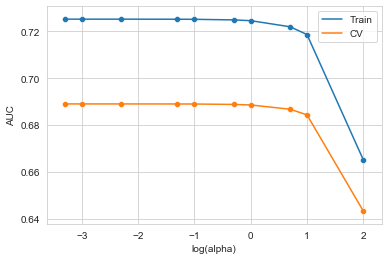

In [124]:
#REFERENCE : CODE IS TAKEN FROM Reference notebooks and modified.
neigh=MultinomialNB() #INITIALIZING THE CLASSIFIER

parameters={"alpha":[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

clf=RandomizedSearchCV(neigh,parameters,cv=3,scoring="roc_auc",return_train_score=True) #CV BY RANDOMSEARCHCV

clf.fit(x_train_bow_vector,y_train) #fitting the dataset

results = pd.DataFrame.from_dict(clf.cv_results_) # RESULTS BEING STORED AS PANDAS DATA FRAME
results = results.sort_values(['param_alpha']) #SORTING BASED ON ALPHA


train_auc=results["mean_train_score"] #STORING TRAINING DATASET AUC SCORE 
cv_auc_score=results["mean_test_score"] #STORING CV DATESET AUC SCORE
alpha=results["param_alpha"] #STORING VALUE OF ALPHA

log_alpha=[]   #GETTING LOG VALUE OF ALL THE ALPHA
for i in alpha:
    log_alpha.append(math.log(i,10))

#PLOTTING AUC SCORE VS LOG(ALPHA) 
sns.set_style("whitegrid")
sns.lineplot(x=log_alpha,y=train_auc,label="Train")
sns.lineplot(x=log_alpha,y=cv_auc_score,label="CV")
sns.scatterplot(x=log_alpha,y=train_auc)
sns.scatterplot(x=log_alpha,y=cv_auc_score)
plt.xlabel("log(alpha)")
plt.ylabel("AUC")
plt.legend()
plt.show()

In [125]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
9,0.215594,0.021416,0.044816,0.023927,0.0005,{'alpha': 0.0005},0.693618,0.687361,0.686186,0.689055,0.003262,1,0.723326,0.725475,0.726854,0.725218,0.001452
4,0.196592,0.005573,0.048449,0.001888,0.001,{'alpha': 0.001},0.693618,0.687360,0.686185,0.689055,0.003262,2,0.723326,0.725474,0.726854,0.725218,0.001452
5,0.204986,0.009584,0.048438,0.007608,0.005,{'alpha': 0.005},0.693617,0.687359,0.686183,0.689053,0.003263,3,0.723323,0.725472,0.726851,0.725215,0.001452
3,0.197691,0.007194,0.050791,0.005541,0.05,{'alpha': 0.05},0.693602,0.687340,0.686160,0.689034,0.003266,4,0.723294,0.725444,0.726821,0.725186,0.001451
7,0.202346,0.006969,0.045622,0.004048,0.1,{'alpha': 0.1},0.693583,0.687316,0.686137,0.689012,0.003268,5,0.723263,0.725413,0.726787,0.725154,0.001450
2,0.193727,0.005091,0.046885,0.000020,0.5,{'alpha': 0.5},0.693426,0.687146,0.685939,0.688837,0.003282,6,0.723005,0.725167,0.726515,0.724896,0.001446
8,0.250316,0.012027,0.066263,0.003644,1,{'alpha': 1},0.693227,0.686928,0.685685,0.688613,0.003302,7,0.722689,0.724860,0.726173,0.724574,0.001437
6,0.203473,0.002148,0.048190,0.001862,5,{'alpha': 5},0.691520,0.685182,0.683664,0.686789,0.003402,8,0.720130,0.722343,0.723450,0.721974,0.001380
0,0.284868,0.106349,0.079271,0.049591,10,{'alpha': 10},0.689223,0.682876,0.681063,0.684387,0.003498,9,0.716856,0.719132,0.720019,0.718669,0.001332
1,0.203183,0.012536,0.059857,0.016931,100,{'alpha': 100},0.646496,0.642780,0.640890,0.643389,0.002329,10,0.663618,0.666073,0.666033,0.665241,0.001148


* BEST ALPHA =0.1 

## TRAINING MODEL WITH BEST ALPHA  FOR SET 1(BOW)

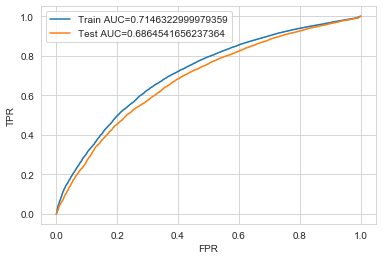

In [148]:
#REFERENCE:Code is taken from Reference Notebooks 

classifier=MultinomialNB(alpha=0.1) #INITIALIZING THE CLASSIFIER

classifier.fit(x_train_bow_vector,y_train) #FITTING THE TRAIN DATESET 

y_train_pred_bow = classifier.predict_proba(x_train_bow_vector)  #PREDICTING THE PROBABILITY FOR TRAIN DATASET
y_test_pred_bow=classifier.predict_proba(x_test_bow_vector) #PREDICTING THE PROBIBILITY FOR TEST DATASET

# COMPUTING FPR ,TPR ,THRESHOLD   
train_fpr_bow,train_tpr_bow, tr_thresholds_bow=roc_curve(y_train,y_train_pred_bow[:,1]) 
test_fpr_bow, test_tpr_bow, test_thresholds_bow=roc_curve(y_test,y_test_pred_bow[:,1])

# PLOTTING FPR VS TPR  
sns.set_style("whitegrid")
sns.lineplot(x=train_fpr_bow,y=train_tpr_bow,label="Train AUC="+str(auc(train_fpr_bow,train_tpr_bow)))
sns.lineplot(x=test_fpr_bow,y=test_tpr_bow,label="Test AUC="+ str(auc(test_fpr_bow, test_tpr_bow)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [149]:
#REFERENCE:Code is taken from Reference Notebooks 

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i >= threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [150]:
best_t_bow = find_best_threshold(tr_thresholds_bow, train_fpr_bow, train_tpr_bow)

the maximum value of tpr*(1-fpr) 0.4414800072217822 for threshold 0.869


Train confusion matrix


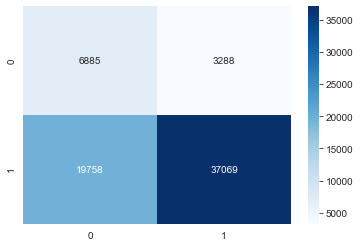

In [152]:
#REFERENCE: https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor

cm_train_bow=confusion_matrix(y_train, predict_with_best_t(y_train_pred_bow[:,1], best_t_bow)) #COMPUTING CONFUSION MATRIX
print("Train confusion matrix") 

# PLOTTING CONFUSION MATRIX AS HEAT MAP FOR TRAIN DATASET(SET 1)
sns.heatmap(cm_train_bow, annot=True,fmt="d",cmap='Blues')
plt.show()

Test confusion matrix


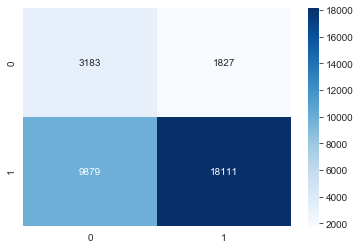

In [154]:
#REFERENCE: https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor

cm_test_bow=confusion_matrix(y_test, predict_with_best_t(y_test_pred_bow[:,1], best_t_bow)) #COMPUTING CONFUSION MATRIX
print("Test confusion matrix")

# PLOTTING CONFUSION MATRIX AS HEAT MAP FOR TEST DATASET (SET 1)
sns.heatmap(cm_test_bow, annot=True,fmt="d",cmap='Blues')
plt.show()

## 2. HYPER PARAMETER TUNING  WITH SET 2 (TFIDF)

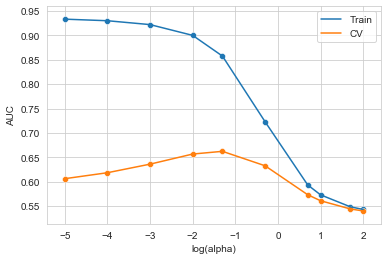

In [89]:
#REFERENCE : #REFERENCE:Code is taken from Reference Notebooks 

neigh=MultinomialNB() #INITIALIZING THE CLASSIFIER

parameters={"alpha":[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]} 

clf=RandomizedSearchCV(neigh,parameters,cv=3,scoring="roc_auc",return_train_score=True) #CV BY RANDOMSEARCHCV

clf.fit(x_train_tfidf_vector,y_train) #FITTING THE TRAINING DATASET 

results = pd.DataFrame.from_dict(clf.cv_results_) # RESULTS BEING STORED AS PANDAS DATA FRAME
results = results.sort_values(['param_alpha']) #SORTING BASED ON ALPHA


train_auc=results["mean_train_score"] #STORING AUC SCORE IN TRAINING DATASET
cv_auc_score=results["mean_test_score"] #STORING AUC SCORE IN TEST DATASET
alpha=results["param_alpha"] #STORING ALPHA  

#GETTING LOG VALUE OF ALL THE ALPHA 
log_alpha=[] 
for i in alpha:
    log_alpha.append(math.log(i,10))

#PLOTTING LOG(ALPHA) VS AUC SCORE (STE 2)
sns.set_style("whitegrid")
sns.lineplot(x=log_alpha,y=train_auc,label="Train")
sns.lineplot(x=log_alpha,y=cv_auc_score,label="CV")
sns.scatterplot(x=log_alpha,y=train_auc)
sns.scatterplot(x=log_alpha,y=cv_auc_score)
plt.xlabel("log(alpha)")
plt.ylabel("AUC")
plt.legend()
plt.show()

In [90]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1,0.167639,0.003449,0.046670,0.003429,1e-05,{'alpha': 1e-05},0.606114,0.603917,0.608719,0.606250,0.001962,6,0.933826,0.931819,0.933923,0.933189,0.000970
2,0.161062,0.011095,0.044934,0.000683,0.0001,{'alpha': 0.0001},0.618738,0.616586,0.620058,0.618461,0.001431,5,0.930791,0.928500,0.930601,0.929964,0.001038
5,0.178280,0.001569,0.043226,0.001890,0.001,{'alpha': 0.001},0.636907,0.634644,0.636543,0.636031,0.000992,3,0.923295,0.920357,0.922430,0.922027,0.001233
0,0.221874,0.082811,0.050583,0.016081,0.01,{'alpha': 0.01},0.658837,0.656185,0.655211,0.656744,0.001532,2,0.902093,0.897749,0.900005,0.899949,0.001774
6,0.167862,0.008470,0.048439,0.002743,0.05,{'alpha': 0.05},0.664483,0.662976,0.659406,0.662288,0.002129,1,0.860453,0.854557,0.857478,0.857496,0.002407
4,0.166724,0.009040,0.041905,0.001673,0.5,{'alpha': 0.5},0.634056,0.633918,0.630144,0.632706,0.001812,4,0.725123,0.720740,0.723018,0.722960,0.001790
7,0.209345,0.074508,0.046292,0.003808,5,{'alpha': 5},0.572827,0.573241,0.574021,0.573363,0.000495,7,0.593833,0.593699,0.592748,0.593427,0.000483
9,0.190488,0.009599,0.056747,0.012870,10,{'alpha': 10},0.560627,0.560467,0.562112,0.561069,0.000741,8,0.573370,0.573754,0.572349,0.573158,0.000593
8,0.164072,0.010029,0.041342,0.002185,50,{'alpha': 50},0.544113,0.543542,0.544964,0.544206,0.000584,9,0.548550,0.549298,0.547981,0.548610,0.000540
3,0.165786,0.007765,0.044606,0.007501,100,{'alpha': 100},0.540139,0.540020,0.540245,0.540135,0.000092,10,0.543043,0.543602,0.542884,0.543176,0.000308


* BEST ALPHA =0.5

## TRAINING MODEL FOR BEST ALPHA WITH SET 2(TFIDF)

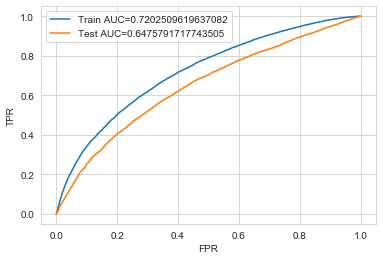

In [156]:
#REFERENCE:Code is taken from Reference Notebooks 
classifier=MultinomialNB(alpha=0.5)

classifier.fit(x_train_tfidf_vector,y_train)

y_train_pred_tfidf = classifier.predict_proba(x_train_tfidf_vector)
y_test_pred_tfidf = classifier.predict_proba(x_test_tfidf_vector)

train_fpr_tfidf , train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train,y_train_pred_tfidf[:,1])
test_fpr_tfidf, test_tpr_tfidf , test_thresholds_tfidf = roc_curve(y_test,y_test_pred_tfidf[:,1])

sns.set_style("whitegrid")
sns.lineplot(x=train_fpr_tfidf , y=train_tpr_tfidf , label="Train AUC=" +  str(auc(train_fpr_tfidf,train_tpr_tfidf)))
sns.lineplot(x=test_fpr_tfidf , y=test_tpr_tfidf , label="Test AUC=" + str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [158]:
best_t_tfidf = find_best_threshold(tr_thresholds_tfidf , train_fpr_tfidf, train_tpr_tfidf)

the maximum value of tpr*(1-fpr) 0.43740536851556877 for threshold 0.943


Train confusion matrix


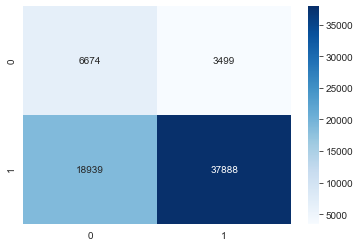

In [159]:
#CONFUSION MATRIX FOR TRAIN DATASET (SET2)
cm_train_tfidf=confusion_matrix(y_train, predict_with_best_t(y_train_pred_tfidf[:,1], best_t_tfidf))
print("Train confusion matrix")
sns.heatmap(cm_train_tfidf, annot=True,fmt="d",cmap='Blues')
plt.show()

Test confusion matrix


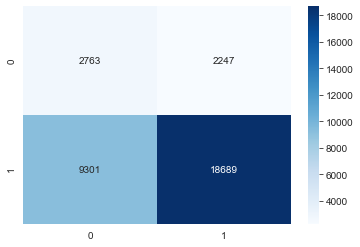

In [160]:
#CONFUSION MATRIX FOR TEST DATASET(SET 2)
cm_test_tfidf = confusion_matrix(y_test, predict_with_best_t(y_test_pred_tfidf[:,1], best_t_tfidf))
print("Test confusion matrix")
sns.heatmap(cm_test_tfidf, annot=True,fmt="d",cmap='Blues')
plt.show()

## TOP 20 FEATURES

In [165]:
#GETTING THE FEATURE PROBABILITIES
negative_feature_prob=classifier.feature_log_prob_[0] #GETTING THE FEATURE PROBABILITES FOR NEGATIVE Yi
positive_feature_prob=classifier.feature_log_prob_[1] #GETTIGN THE FEATURE PROBABILITIES FOR POSITIVE Yi

In [170]:
#SORTING THE PROBABILITIES INDEX
negtive_sorted_feature_index = negative_feature_prob.argsort()
positive_sorted_feature_index = positive_feature_prob.argsort()

In [184]:
#GETTING TOP 20 PROBABILITIES INDEX
negtive_sorted_feature_index[::-1][0:20]

array([   99,   100,     2,    64,     8,    65,     3,     5,    88,
          86,    87,     6,    95,    67,    13,    62, 39964,    60,
          69,     7], dtype=int64)

In [176]:
#GETTING TOP 20 PROBABILITIES
positive_sorted_feature_index[::-1][0:20]

array([   99,   100,     2,    64,     8,    65,     3,     5,    86,
          88,    87,     6,    13,    62, 39964,    95,    67,    60,
          84,     7], dtype=int64)

In [206]:
#STORING ALL FEATURES IN A LIST FOR SET 2 (TFIDF)
feature_names=[]
feature_names.extend(feature_prefix)
feature_names.extend(feature_grade)
feature_names.extend(feature_state)
feature_names.extend(feature_clean_categories)
feature_names.extend(feature_clean_subcategories)
feature_names.append("price")
feature_names.append(" teacher_number_of_previously_posted_projects")
feature_names.extend(feature_tfidf)

In [210]:
len(feature_names)

46675

In [217]:
feature_names=np.array(feature_names)  # CONVERTING FEATURE NAME LIST TO NUMPY ARRAY

In [220]:
# GETTING THE TOP 20 FEATURES FOR  POSITIVE Yi
positive_top_20_features=feature_names[positive_sorted_feature_index[::-1][0:20]]
print(positive_top_20_features)

['price' ' teacher_number_of_previously_posted_projects' 'mrs'
 'literacy_language' 'grades_prek_2' 'math_science' 'ms' 'grades_3_5'
 'literacy' 'mathematics' 'literature_writing' 'grades_6_8' 'ca'
 'health_sports' 'students' 'specialneeds' 'specialneeds'
 'appliedlearning' 'health_wellness' 'grades_9_12']


In [221]:
# GETTING THE TOP 20 FEATURES FOR  NEGATIVE Yi
negative_top_20_features=feature_names[negtive_sorted_feature_index[::-1][0:20]]
print(negative_top_20_features)

['price' ' teacher_number_of_previously_posted_projects' 'mrs'
 'literacy_language' 'grades_prek_2' 'math_science' 'ms' 'grades_3_5'
 'mathematics' 'literacy' 'literature_writing' 'grades_6_8' 'specialneeds'
 'specialneeds' 'ca' 'health_sports' 'students' 'appliedlearning'
 'appliedsciences' 'grades_9_12']


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [5]:
dict={"Vectorizer":["BOw","TFIDF"],"BEST ALPHA":[0.1,0.5],"AUC":[0.6864,0.6475]}

In [6]:
pd.DataFrame(dict)

,Vectorizer,BEST ALPHA,AUC
0,BOw,0.1,0.6864
1,TFIDF,0.5,0.6475
